In [1]:
# Titanic Project:

In [2]:
# Problem Statement:
# The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912.
# It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points,
# and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic
# would survive the sinking or not.

In [3]:
# First of all import all the required libraries like pandas, numpy, seaborn, sklearn, matplotlib etc. And load the data (titanic_train.csv file) from GITHUB link (https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv) to train the model and test the model and show the top five rows of the data.

In [4]:
# Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
#Reading the data

In [7]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [8]:
#printing first five rows of dataframe

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# printing total number of rows and columns in dataframe

In [14]:
titanic_data.shape

(891, 12)

In [15]:
# here in this dataframe we have 891 rows and 12 columns. Here we have Survived column as Target variables and rest columns are features

In [16]:
# getting some information about dataframe

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# The dataframe has 891 examples and 11 features including the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. We can see missing values in Age,Cabin and embarked colunm for which we will perform some perations to fill the missing values. Below I have listed the features with a short description:

In [19]:
# Features discription

In [20]:
#PassengerId: Unique Id of a passenger 
#survived:  Survived 
#pclass:    Ticket class     
#sex:       Sex of pasanger     
#Age:       Age in years     
#sibsp:     siblings / spouses aboard the Titanic     
#parch:     parents / children aboard the Titanic     
#ticket:    Ticket number     
#fare:      Passenger fare     
#cabin:     Cabin number     
#embarked:  Port of Embarkation

In [21]:
# Checking the number of missing values in each column

In [22]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# Here we can see the we have 177 missing values from Age column and 687 missing values from cabin column and 2 missing values from embarked column.
# since maximum values are missing from cabin column, we need to remove this particular column from dataset.

In [24]:
# handling the missing values: drop the "Cabin" column from dataframe

In [25]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [26]:
# replacing the missing values in "Age" column with mean value

In [27]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [28]:
# here we have taken the dataframe and finding the mean value of this column and fill all the missing values in Age column with mean values.

In [29]:
# finding the mode value of "Embarked" column:
# we can see that there are only 2 values missing in this column and there are total 3 values present i.e C Q and S.
# so we are going to find which values is repeated most number of times and then we will replace the missing value with that repeted value i.e mode value.

In [30]:
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [31]:
print(titanic_data['Embarked'].mode()[0])

S


In [32]:
# so we can replace the values in Embarked column with value of "S" as it repeated several timed in particular Embarked column.

In [33]:
# replacing the missing values in 'Embarked' column with mode value

In [34]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [35]:
# now checking the number of missing values in each column in datadrame

In [36]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
# Now we can see that there is nill missing value in dataframe

In [38]:
# DATA ANALYSIS: getting some stasticial measures about the data

In [39]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# we can see the count,mean,std deviation,min,max,first,second and third quartile values of each column from above output.
# this data is not useful for categorical columns and only useful for numeric value columns.
# we have Age and Fare columns as numerical value columns and Survived and Pclass as categorical columns.

In [41]:
# Finding the number of people survived and not survived

In [42]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
# here 0 represents the number of peoples not survived i.e 549 peopled not survived and 1 represents the number of people survived i.e 342 peoples survived

In [44]:
# DATA VISUALIZATION

In [45]:
sns.set()

In [46]:
#making a count plot for "Survived" column

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

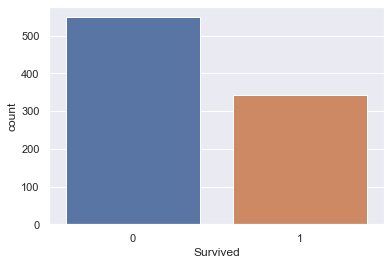

In [47]:
sns.countplot('Survived', data=titanic_data)

In [48]:
# now you can see the number of people did not survived which is represented by 0 and survived people represented by value 1 and the number of people did not survived are more.

In [49]:
# with sex and let's also replace it here so now let's see the number of people survived
# and here you can see the number of male who have survived and the number of female who have survived the titanic

In [50]:
# making a count plot for "Sex" column

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

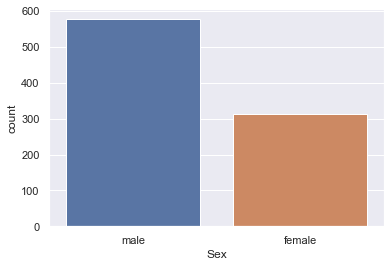

In [58]:
sns.countplot('Sex', data=titanic_data)

In [52]:
# here you can see the number of male who have survived and the number of female who have survived the titanic. number of males survived are more than number of females survived as per data.

In [53]:
# finding no of survived peoples as per 'Sex' category

In [54]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [55]:
# here you can see the number of male who have survived are 577 and the number of female who have survived the titanic are 314. number of males survived are more than number of females survived as per data.

In [56]:
# finding no of survived peoples Gender wise

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

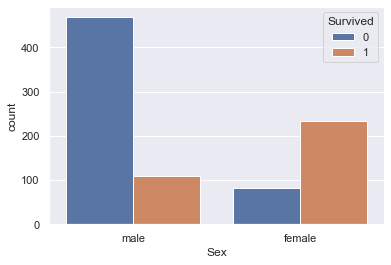

In [57]:
sns.countplot('Sex', hue='Survived', data=titanic_data)

In [59]:
# here we can see  0 value represents the blue color which is the no of peoples survived and orange color represent 1 which is the number of people surveyed . Out of 577 males only 100 males survived and out of 314 females, more than 200 females survived.
# so the number of female who have survived the titanic accident is more so this is one of the very important insight that we can get from this data so what it is is so in the time of this titanic accident
# females have been given more priority to be saved so it is very logical right so whenever this kind of disaster happens
# so the importance will be given for females and children to be saved first after that only adult male would be saved so that is what we are getting from this particular insight so this is a very important

In [60]:
# making a count plot for "Pclass" column

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

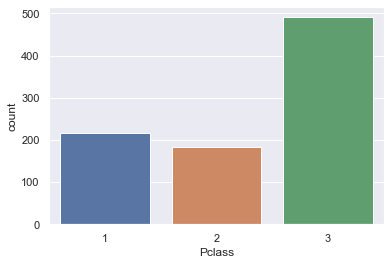

In [61]:
sns.countplot('Pclass', data=titanic_data)

In [126]:
# we have three values in particular column i.e 1st 2nd and 3rd class. we have more people survived in 3rd class and less people in 2nd and 1st class.
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

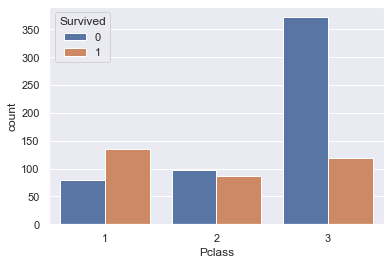

In [63]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

In [64]:
#  we have more people survived in 3rd class and less people survived in 2nd and 1st class

In [65]:
# making count plot for Embarked column

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

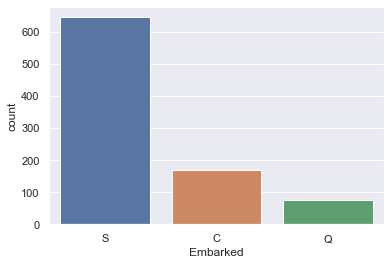

In [66]:
sns.countplot('Embarked', data=titanic_data)

In [127]:
# here we can see 'S' is having highest number of Embarked one survived as compared to 'c' and 'Q' being lowest.
titanic_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

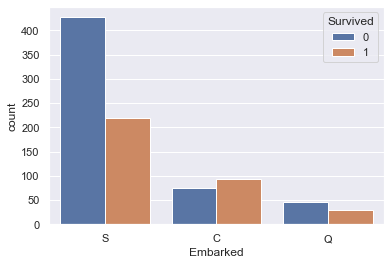

In [68]:
sns.countplot('Embarked', hue='Survived', data=titanic_data)

In [69]:
# here we can see 'S' is having highest number of Embarked one survived as compared to 'c' and 'Q' being lowest.

In [70]:
# making count plot of SibSp column

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

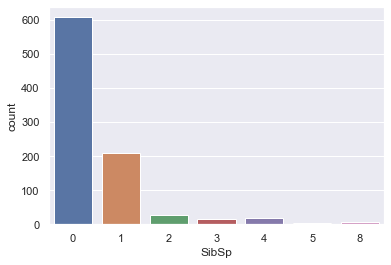

In [71]:
sns.countplot('SibSp', data=titanic_data)

In [128]:
# # we can clearly see the highest survival in SibSp is on 0 and 1 rest all are very low
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

D:\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

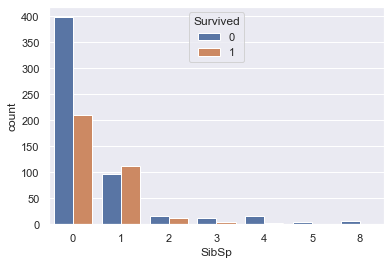

In [73]:
sns.countplot('SibSp', hue='Survived', data=titanic_data)

In [74]:
# we can clearly see the highest survival in SibSp is on 0 and 1 rest all are very low

In [75]:
# Training the data

In [77]:
# we have some colunms with text characters which is not read by machine learning in computers so we will replace the text with some numerical values.
# here we have some catrgorical column like Sex and Embark which have text values which we need to convert into numerical values through encoding techniques

In [78]:
# Encoding the categorical columns:

In [79]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [80]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
# converting categorical columns:

In [85]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [86]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [87]:
# now we can see that all the text values in Sex and Embarked column has been changed to numeric values

In [88]:
# Seperating the Target and Features columns from data frame

In [89]:
# machine learning model can predict whether the person has survived or not by going through these features so this is our target on the other feet uh columns like the p class gender age
# siblings patch and fair embargo nothing but features and this survived is nothing but a target column

In [90]:
# so we wil create two variables as x and y x and y.
# so in x we will do is take this titanic data and drop certain columns so as we don't need this name column so it doesn't make sense as we know  people won't be saved based on their name so we will remove this name column
# and this ticket number also didn't make you know much sense so we will remove this ticket column and also the passenger id column so id is just you know the serial numbers for the data point so we don't want these three values which are passenger id name and ticket so they are just identity so we don't need those values so i'm going to drop them so uh mention the data frame name which is

In [97]:
x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [98]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [99]:
# here we can see that x column wont contains all the 4 columns i.e 'PassengerId','Name','Ticket','Survived'

In [100]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [101]:
# we can see it contained all the values of Survived column.

In [102]:
# SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [104]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [105]:
# here we can see that our 80% data has splitted to testing data and 20% data got splited to training data.

In [106]:
#MODEL TRAINING

In [107]:
# LOGISTIC REGRESSION

In [108]:
model = LogisticRegression()

In [109]:
# training the LogisticRegression model with training data
model.fit(x_train, y_train)

D:\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
# MODEL EVALUATION

In [111]:
# ACCURACY SCORE

In [112]:
# Accuracy of training data

In [113]:
x_train_prediction = model.predict(x_train)

In [114]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [115]:
# These are the values predicted by our model. Regression model that we have trained with our training data which are extreme and white rain and i'm using this model dot predict 
# and inside this just mention x train alone, so what happens is now it will go through this x train and it will try to predict the value as either one or zero so this one or zero represents
# whether the person has survived or not right so it is a target variable so once we predict this value and it will store all the predictions to extreme predictions
# so these are the values predicted by our model here zero represent the person didn't survive one represents the person has surveyed.
#so these are the values predicted by our model but we need to compare this with the original value so original value is nothing but y train so the original value and the one which are predicted by our model so this is our accuracy score so what this accuracy is for is like comparing how many correct predictions


In [116]:
# we will create another variable as training data accuracy

In [119]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('accuracy score of training data : ', training_data_accuracy)

accuracy score of training data :  0.8075842696629213


In [120]:
# here we are getting an accuracy score of 80.75 almost 81 percentage so 0.8 0 represents 80 percentage and any accuracy of more than 75 is considered as good so what is known by this 80 is when you make 100 predictions whether the person has survived or not
# our model will predict correctly for 80 times so out of under you will get correct predictions for 80 values so that the accuracy score of our model and every time we try to improve this accuracy with certain methods. 
# now understand that we can find this accuracy score by this using this accuracy score and for this training data we are getting this accuracies for us 81 percentage now 
# we will evaluate our model with our test data so we will train our model with the training data
# and they evaluate our model with test data so we have just predicted only the training data right
# so now let's do the same for test data because the model didn't see the test data

In [121]:
# Accuracy of test data

In [122]:
x_test_prediction = model.predict(x_test)

In [123]:
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [124]:
# these are the values predicted by our model for test data. we know that test data only contains 171 values right so this is for the test data.
# we can find the accuracy score so training data accuracy so it should be replaced with test data accuracy which we have found here

In [125]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('accuracy score of test data : ', test_data_accuracy)

accuracy score of test data :  0.7821229050279329


In [ ]:
# accuracy score here is about 0.78 percentage. so you can see here the accuracy score on training data and testing data is not much different so it is very close right if the two values is
# we know very different let's say that if the accuracy is 4 of training data is around 95 percentage and the accuracy is four on the test data is around 40 days that means our model has over fitted so over fitting is under fitting or some problems which we encounter in machine learning and deep trending.
# our model tries to learn more from our training data and it doesn't generalize the idea. In this case Accuracy data for Training is huge and accuracy data for testing is less. 